In [3]:
import pandas as pd

df_events = pd.read_csv("All ICD10 Codes with Diseases Names and Dates Data.csv")

# strip extra spaces from column names
df_events.columns = df_events.columns.str.strip()

print("Step 1: Event-Level Data")
print("Unique Participants:", df_events["Participant ID"].nunique())
print("Total Events:", df_events.shape[0])
df_events.head(5)

Step 1: Event-Level Data
Unique Participants: 440014
Total Events: 6431283


,Participant ID,Sex,Year of Birth,Month of Birth,Ethnicity,Combined ICD10 Diseases,Combined ICD10 Diagnosis Date,Combined ICD10 Codes
0,1000018,Female,1959.0,March,British,Other specified bacterial agents as the cause...,2008-12-16,B96.8
1,1000018,Female,1959.0,March,British,Primary adrenocortical insufficiency,2018-12-21,E27.1
2,1000018,Female,1959.0,March,British,Deficiency of other specified B group vitamins,2018-12-21,E53.8
3,1000018,Female,1959.0,March,British,Nerve root and plexus compressions in interve...,2009-05-20,G55.1
4,1000018,Female,1959.0,March,British,Essential (primary) hypertension,2014-06-19,I10


In [4]:
from datetime import datetime
current_year = datetime.now().year
df_events['Age'] = current_year - df_events['Year of Birth']
df_events.drop(columns=['Year of Birth', 'Month of Birth'], inplace=True)

df_events.head(5)

,Participant ID,Sex,Ethnicity,Combined ICD10 Diseases,Combined ICD10 Diagnosis Date,Combined ICD10 Codes,Age
0,1000018,Female,British,Other specified bacterial agents as the cause...,2008-12-16,B96.8,66.0
1,1000018,Female,British,Primary adrenocortical insufficiency,2018-12-21,E27.1,66.0
2,1000018,Female,British,Deficiency of other specified B group vitamins,2018-12-21,E53.8,66.0
3,1000018,Female,British,Nerve root and plexus compressions in interve...,2009-05-20,G55.1,66.0
4,1000018,Female,British,Essential (primary) hypertension,2014-06-19,I10,66.0


In [5]:
columns = ['Participant ID', 'Sex', 'Age', 'Ethnicity', 'Combined ICD10 Diseases', 
           'Combined ICD10 Diagnosis Date', 'Combined ICD10 Codes']
df_events = df_events[columns]

df_events.head(5)

,Participant ID,Sex,Age,Ethnicity,Combined ICD10 Diseases,Combined ICD10 Diagnosis Date,Combined ICD10 Codes
0,1000018,Female,66.0,British,Other specified bacterial agents as the cause...,2008-12-16,B96.8
1,1000018,Female,66.0,British,Primary adrenocortical insufficiency,2018-12-21,E27.1
2,1000018,Female,66.0,British,Deficiency of other specified B group vitamins,2018-12-21,E53.8
3,1000018,Female,66.0,British,Nerve root and plexus compressions in interve...,2009-05-20,G55.1
4,1000018,Female,66.0,British,Essential (primary) hypertension,2014-06-19,I10


In [6]:
# british and non-british
df_events['Ethnicity'] = df_events['Ethnicity'].apply(lambda x: 'British' if x == 'British' else 'Non-British')

# reordering columns
columns = ['Participant ID', 'Sex', 'Age', 'Ethnicity', 'Combined ICD10 Diseases', 
           'Combined ICD10 Diagnosis Date', 'Combined ICD10 Codes']
df_events = df_events[columns]

df_events.head(5)

,Participant ID,Sex,Age,Ethnicity,Combined ICD10 Diseases,Combined ICD10 Diagnosis Date,Combined ICD10 Codes
0,1000018,Female,66.0,British,Other specified bacterial agents as the cause...,2008-12-16,B96.8
1,1000018,Female,66.0,British,Primary adrenocortical insufficiency,2018-12-21,E27.1
2,1000018,Female,66.0,British,Deficiency of other specified B group vitamins,2018-12-21,E53.8
3,1000018,Female,66.0,British,Nerve root and plexus compressions in interve...,2009-05-20,G55.1
4,1000018,Female,66.0,British,Essential (primary) hypertension,2014-06-19,I10


In [7]:
import re

df_comorbid = df_events

# Define ICD‑10 patterns based on the previously derived codes.
# Adjust regex patterns if your code ranges differ or are more granular.
icd_patterns = {
    "Dementia": r"^F0[0-3]",                         # Matches F00 to F03
    "Depression": r"^F3[2-3]",                       # Matches F32 to F33
    "Stroke": r"^(I60|I61|I62|I63|I64)",             # Matches I60 to I64
    "Thyroid disease": r"^E0[0-7]",                  # Matches E00 to E07
    "Atrial fibrillation": r"^I48",                  # Matches I48
    "Ischaemic heart disease": r"^I2[0-5]",          # Matches I20 to I25
    "Left heart failure": r"^I50|I50\.1|I50\.9",     # Matches I50
    "Myocardial infarction": r"^I2[1-2]",            # Matches I21 to I22
    "Valvular disease": r"^I3[4-7]",                 # Matches I34 to I37
    "Cardiomyopathy": r"^I42",                       # Matches I42
    "COPD": r"^J44",                                 # Matches J44
    "Sleep apnoea": r"^G47\.3",                      # Matches J47.3
    "Asthma": r"^(J45)",                             # Matches J45
    "Restrictive airway disease": r"^(J98\.4|J84\.)",# Matches J84 and J98.4
    "Pulmonary embolism": r"^I26",                   # Matches I26
    "Chronic liver disease": r"^K7[0-7]",            # Matches K70 to K77
    "Chronic kidney disease": r"^N18",               # Matches N18
    "Diabetes": r"^E1[0-4]",                         # Matches E10 to E14
    "Essential hypertension": r"^I10",               # Matches I10
    "Hypercholesterolemia": r"^E78\.0",              # Matches E78.0
    "PH": r"^I27\.0|I27\.2|I27\.9"                   # Matches I27.0, I27.2, I27.9
}



# check if an ICD10 code matches a given pattern
def icd_matches(code, pattern):
    if pd.isnull(code):
        return False
    return bool(re.match(pattern, code))

# dictionary to store DataFrames of filtered records for each condition
filtered_dfs = {}

for disease, pattern in icd_patterns.items():
    mask = df_comorbid["Combined ICD10 Codes"].apply(lambda x: icd_matches(x, pattern))
    filtered_dfs[disease] = df_comorbid[mask]
    print(f"{disease}: {filtered_dfs[disease].shape[0]} records found.")

# concatenate all filtered records into one df with a new 'Disease' column
combined = pd.concat(
    [df.assign(Disease=disease) for disease, df in filtered_dfs.items()],
    ignore_index=True
)

print("Combined filtered data:", combined.shape)
combined.head(5)


Dementia: 9193 records found.
Depression: 32638 records found.
Stroke: 17083 records found.
Thyroid disease: 39804 records found.
Atrial fibrillation: 57100 records found.
Ischaemic heart disease: 163060 records found.
Left heart failure: 24690 records found.
Myocardial infarction: 19385 records found.
Valvular disease: 19545 records found.
Cardiomyopathy: 4382 records found.
COPD: 31282 records found.
Sleep apnoea: 10323 records found.
Asthma: 50153 records found.
Restrictive airway disease: 8204 records found.
Pulmonary embolism: 9145 records found.
Chronic liver disease: 23046 records found.
Chronic kidney disease: 28470 records found.
Diabetes: 62599 records found.
Essential hypertension: 152308 records found.
Hypercholesterolemia: 71025 records found.
PH: 3236 records found.
Combined filtered data: (836671, 8)


,Participant ID,Sex,Age,Ethnicity,Combined ICD10 Diseases,Combined ICD10 Diagnosis Date,Combined ICD10 Codes,Disease
0,1000199,Male,83.0,British,Unspecified dementia,2018-07-24,F03,Dementia
1,1001004,Male,79.0,Non-British,Dementia in other specified diseases classifi...,2021-01-24,F02.8,Dementia
2,1001004,Male,79.0,Non-British,Unspecified dementia,2021-01-21,F03,Dementia
3,1001895,Male,78.0,British,Dementia in Pick's disease,2020-10-28,F02.0,Dementia
4,1002439,Female,83.0,Non-British,"Dementia in Alzheimer's disease, unspecified",2017-11-19,F00.9,Dementia


In [8]:
# combined.to_csv('Pre-time-series.csv', index=False)

In [9]:
print("Unique Participants:", combined["Participant ID"].nunique())
print("Total Events:", combined.shape[0])

Unique Participants: 247795
Total Events: 836671


In [10]:
def icd_matches(code, pattern):
    if pd.isnull(code):
        return 0
    return 1 if re.search(pattern, code) else 0

for disease, pattern in icd_patterns.items():
    df_events[disease] = df_events["Combined ICD10 Codes"].apply(lambda x: icd_matches(x, pattern))

print("\nEvent-level Data with Binary Flags")
display(df_events.head(5))


Event-level Data with Binary Flags


,Participant ID,Sex,Age,Ethnicity,Combined ICD10 Diseases,Combined ICD10 Diagnosis Date,Combined ICD10 Codes,Dementia,Depression,Stroke,...,Sleep apnoea,Asthma,Restrictive airway disease,Pulmonary embolism,Chronic liver disease,Chronic kidney disease,Diabetes,Essential hypertension,Hypercholesterolemia,PH
0,1000018,Female,66.0,British,Other specified bacterial agents as the cause...,2008-12-16,B96.8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1000018,Female,66.0,British,Primary adrenocortical insufficiency,2018-12-21,E27.1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1000018,Female,66.0,British,Deficiency of other specified B group vitamins,2018-12-21,E53.8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1000018,Female,66.0,British,Nerve root and plexus compressions in interve...,2009-05-20,G55.1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1000018,Female,66.0,British,Essential (primary) hypertension,2014-06-19,I10,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [11]:
disease_columns = list(icd_patterns.keys())

# baseline demographic columns
demo_columns = ["Sex", "Age", "Ethnicity"]

# aggregation dictionary: for each disease column use 'max' and for demographics use 'first'.
agg_dict = {col: "max" for col in disease_columns}
for col in demo_columns:
    agg_dict[col] = "first"

# group by the unique identifier (ppt ID) and aggregate
df_participants = df_events.groupby("Participant ID").agg(agg_dict).reset_index()

# each row represents one participant
print("Participant-level sample:")
df_participants.head(5)
print("Total participants:", df_participants.shape[0])
print("Unique Participants:", df_participants["Participant ID"].nunique())

df_participants.head(5)

Participant-level sample:
Total participants: 440014
Unique Participants: 440014


,Participant ID,Dementia,Depression,Stroke,Thyroid disease,Atrial fibrillation,Ischaemic heart disease,Left heart failure,Myocardial infarction,Valvular disease,...,Pulmonary embolism,Chronic liver disease,Chronic kidney disease,Diabetes,Essential hypertension,Hypercholesterolemia,PH,Sex,Age,Ethnicity
0,1000018,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,Female,66.0,British
1,1000020,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,Female,77.0,British
2,1000037,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,Male,74.0,British
3,1000043,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Female,69.0,British
4,1000051,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Male,66.0,Non-British


In [12]:
disease_columns = [col for col in icd_patterns.keys() if col != 'PH']  # exclude PH

# drop the old lower‑case column
df_participants.drop(columns=['disease_count'], inplace=True, errors='ignore')

# new column with the sum of all comorbidity flags per participant
df_participants["Disease Count"] = df_participants[disease_columns].sum(axis=1)

# filter out participants with fewer than 2 comorbidities
df_filtered = df_participants[df_participants["Disease Count"] >= 2].copy()

print("Filtered participant-level data (at least 2 comorbidities):")
print("Total participants after filtering:", df_filtered.shape[0])
print("Unique Participants:", df_filtered["Participant ID"].nunique())

df_filtered.head(5)

Filtered participant-level data (at least 2 comorbidities):
Total participants after filtering: 152854
Unique Participants: 152854


,Participant ID,Dementia,Depression,Stroke,Thyroid disease,Atrial fibrillation,Ischaemic heart disease,Left heart failure,Myocardial infarction,Valvular disease,...,Chronic liver disease,Chronic kidney disease,Diabetes,Essential hypertension,Hypercholesterolemia,PH,Sex,Age,Ethnicity,Disease Count
0,1000018,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,Female,66.0,British,2
2,1000037,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,Male,74.0,British,2
11,1000144,0,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,Male,70.0,British,3
13,1000161,0,0,0,0,0,1,0,1,0,...,0,0,0,1,1,0,Female,82.0,Non-British,5
14,1000172,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,Female,80.0,Non-British,2


In [13]:
# df_filtered.to_csv('Cleaned Dataset.csv', index=False)
# saved a csv file of main dataset completely cleaned - need to do an EDA of this dataset prior to any feature selection 

In [14]:
from sklearn.preprocessing import LabelEncoder
df_filtered['Sex'] = df_filtered['Sex'].map({'Female': 0, 'Male': 1})
le = LabelEncoder()
df_filtered['Ethnicity'] = le.fit_transform(df_filtered['Ethnicity'])

In [15]:
df_filtered = pd.read_csv("Cleaned Dataset.csv")

/opt/anaconda3/lib/python3.12/site-packages/shap/explainers/_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


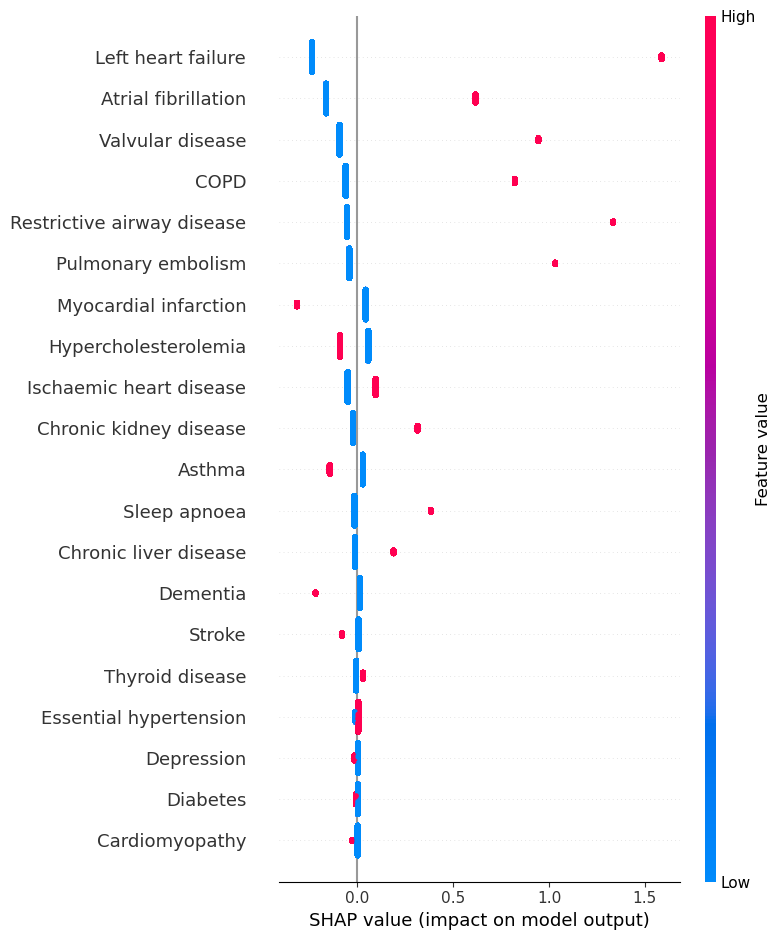

In [16]:
from sklearn.linear_model import LogisticRegression
import shap

# Define features for the model: include your disease flags and baseline demographics
features = list(icd_patterns.keys())

if "PH" in features:
    features.remove("PH")


X_model = df_filtered[features]
y_model = df_filtered["PH"]

# Fit a logistic regression model (or use another model as suitable)
model = LogisticRegression(max_iter=1000)
model.fit(X_model, y_model)

# Use SHAP's explainer to interpret the model (for a linear model, use LinearExplainer)
explainer = shap.LinearExplainer(model, X_model, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_model)


# Plot SHAP summary for feature importance
shap.summary_plot(shap_values, X_model)

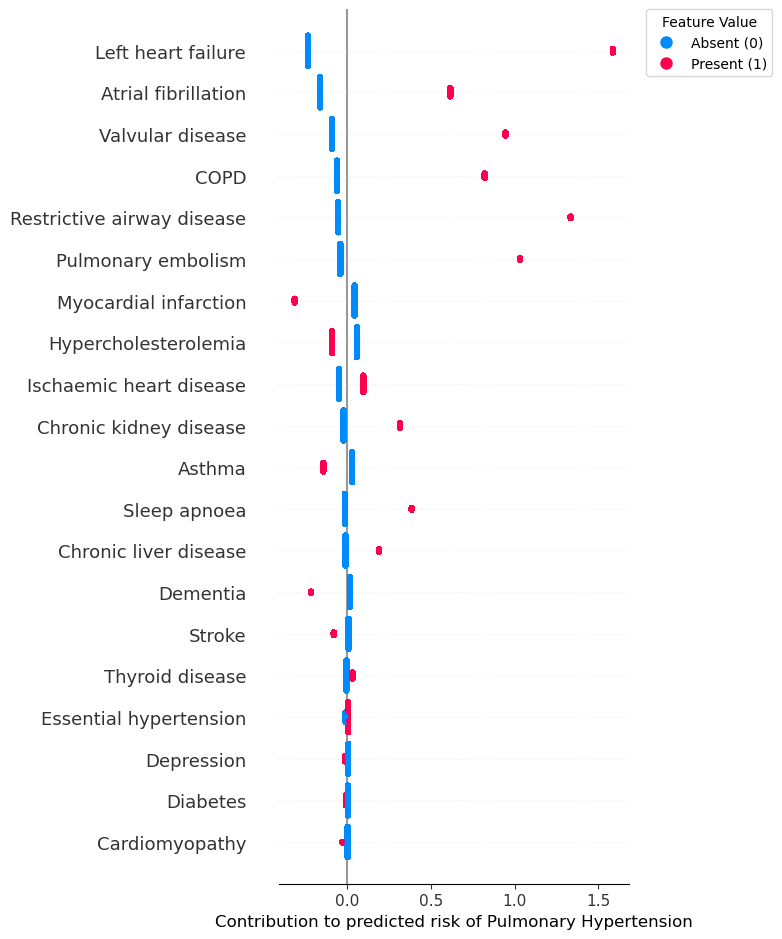

In [19]:
import shap
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Plot the SHAP beeswarm (suppress color bar and auto-show)
shap.summary_plot(
    shap_values,
    X_model,
    color=shap_values,
    color_bar=False,
    show=False
)

# Define exact SHAP dot colors for binary values
color_absent = '#008bfb'   # Blue for 0
color_present = '#ff0051'  # Red for 1

# Custom binary legend using exact colors
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Absent (0)', markerfacecolor=color_absent, markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Present (1)', markerfacecolor=color_present, markersize=10)
]

# Position legend neatly outside
plt.legend(
    handles=legend_elements,
    title='Feature Value',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0.
)

# Update axis label
plt.xlabel("Contribution to predicted risk of Pulmonary Hypertension", fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
matched_df = pd.read_csv('Matched_Cohort.csv')

In [ ]:
matched_df.head(10)

,Participant ID,Dementia,Depression,Stroke,Thyroid disease,Atrial fibrillation,Ischaemic heart disease,Left heart failure,Myocardial infarction,Valvular disease,...,Chronic liver disease,Chronic kidney disease,Diabetes,Essential hypertension,Hypercholesterolemia,PH,Sex,Age,Ethnicity,Disease Count
0,3263701,0,0,0,0,1,1,1,0,1,...,1,1,0,1,0,1,Female,85.0,British,7
1,5162291,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,Female,85.0,British,2
2,5850901,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,1,Male,71.0,British,4
3,1726911,1,0,0,1,1,1,1,0,0,...,0,1,1,1,1,1,Female,84.0,British,11
4,4521606,0,0,0,0,1,1,0,0,0,...,0,0,0,1,0,1,Male,76.0,British,4
5,4295543,0,1,0,1,1,0,1,0,0,...,1,0,0,1,0,1,Female,81.0,British,6
6,5126082,0,0,0,0,1,1,0,1,0,...,0,1,1,1,1,1,Female,67.0,Non-British,9
7,4153305,0,0,0,0,1,0,1,0,1,...,1,1,0,1,0,1,Male,67.0,British,6
8,3847505,0,1,0,0,0,1,0,1,0,...,0,0,0,1,0,1,Male,80.0,British,6
9,5636923,0,1,0,1,0,1,0,0,0,...,0,0,1,1,1,1,Female,80.0,British,6


In [ ]:
from sklearn.preprocessing import LabelEncoder
matched_df['Sex'] = matched_df['Sex'].map({'Female': 0, 'Male': 1})
le = LabelEncoder()
matched_df['Ethnicity'] = le.fit_transform(matched_df['Ethnicity'])

/opt/anaconda3/lib/python3.12/site-packages/shap/explainers/_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


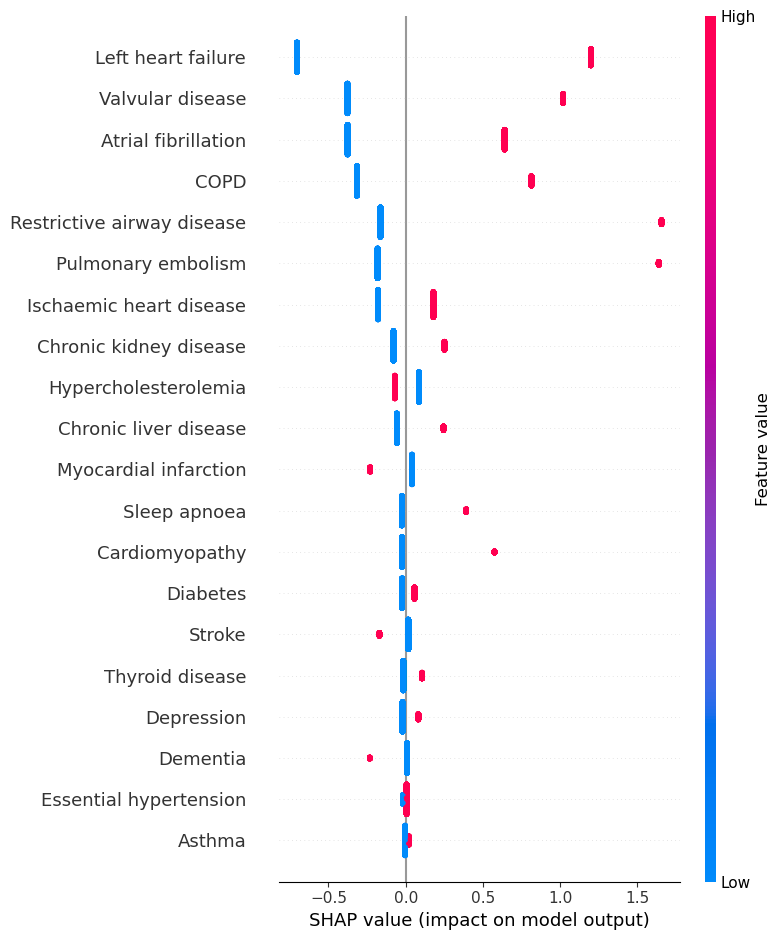

In [ ]:
from sklearn.linear_model import LogisticRegression
import shap

# Define features for the model: include your disease flags and baseline demographics
features = list(icd_patterns.keys())

if "PH" in features:
    features.remove("PH")


X_model = matched_df[features]
y_model = matched_df["PH"]

# Fit a logistic regression model (or use another model as suitable)
model = LogisticRegression(max_iter=1000)
model.fit(X_model, y_model)

# Use SHAP's explainer to interpret the model (for a linear model, use LinearExplainer)
explainer = shap.LinearExplainer(model, X_model, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_model)


# Plot SHAP summary for feature importance
shap.summary_plot(shap_values, X_model)

In [ ]:
import shap
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Plot the SHAP beeswarm (suppress color bar and auto-show)
shap.summary_plot(
    shap_values,
    X_test_sample,
    color=feature_values_binary,
    color_bar=False,
    show=False
)

# Define exact SHAP dot colors for binary values
color_absent = '#008bfb'   # Blue for 0
color_present = '#ff0051'  # Red for 1

# Custom binary legend using exact colors
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Absent (0)', markerfacecolor=color_absent, markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Present (1)', markerfacecolor=color_present, markersize=10)
]

# Position legend neatly outside
plt.legend(
    handles=legend_elements,
    title='Feature Value',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0.
)

# Update axis label
plt.xlabel("Contribution to predicted risk of Pulmonary Hypertension", fontsize=12)
plt.tight_layout()
plt.show()


NameError: name 'shap_values' is not defined